In [0]:
%matplotlib inline
import pandas as pd
from fbprophet import Prophet
import matplotlib.pyplot as plt
plt.style.use('ggplot')
plt.rcParams['figure.figsize']=(20,5)

In [4]:
from google.colab import files
uploaded = files.upload()


Saving data.csv to data.csv


In [0]:
import io
USD = pd.read_csv(io.BytesIO(uploaded['data.csv']))

currency_rate = USD.copy()

In [41]:
df = currency_rate.rename(columns={'date': 'ds', 'monthly_average': 'y'})
df.head(10)

,ds,y
0,2005-05-26,1.386
1,2005-05-27,1.371
2,2005-05-30,1.365
3,2005-05-31,1.365
4,2005-06-01,1.361
5,2005-06-02,1.347
6,2005-06-03,1.367
7,2005-06-06,1.367
8,2005-06-07,1.372
9,2005-06-08,1.361


In [42]:
df.tail()

,ds,y
3726,2019-06-20,5.764
3727,2019-06-21,5.821
3728,2019-06-23,5.764
3729,2019-06-24,5.809
3730,2019-06-25,5.796


In [0]:
#import pandas as pd
#df.index = pd.DatetimeIndex(df.ds)

In [0]:
#df = df.drop(columns="ds")

In [45]:
df.tail()

,ds,y
3726,2019-06-20,5.764
3727,2019-06-21,5.821
3728,2019-06-23,5.764
3729,2019-06-24,5.809
3730,2019-06-25,5.796


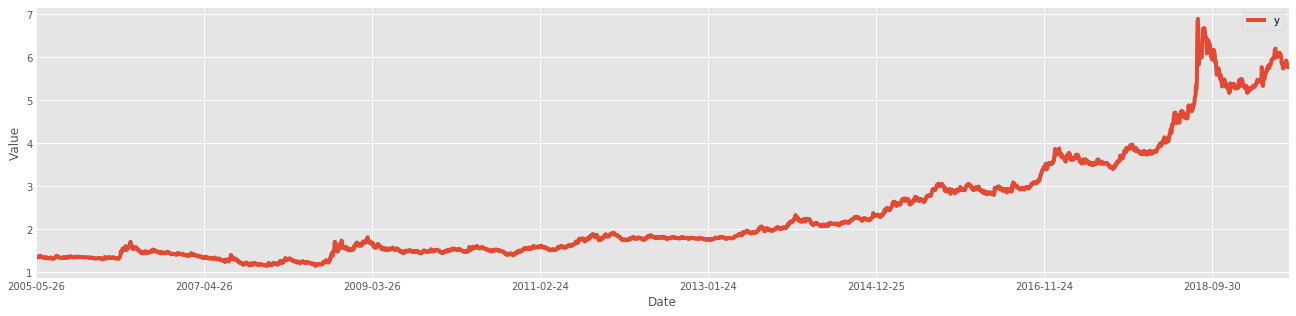

In [46]:
#ax = pd.DatetimeIndex(df.ds)
ax = df.set_index('ds').plot()
ax.set_ylabel('Currency')
ax.set_xlabel('Date')
plt.xlabel('Date')
plt.ylabel('Value')
plt.show()

In [47]:
currency_rate_model = Prophet(
    yearly_seasonality= True, 
    weekly_seasonality=False, 
    daily_seasonality=False
)

# model fit
currency_rate_model.fit(df)

In [0]:
period = 90 #30 day

future_dates = currency_rate_model.make_future_dataframe(periods=period, freq='D')

In [49]:
forecast = currency_rate_model.predict(future_dates)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(10)

,ds,yhat,yhat_lower,yhat_upper
3811,2019-09-14,6.257915,5.996169,6.508349
3812,2019-09-15,6.259520,6.019496,6.537374
3813,2019-09-16,6.261191,5.983493,6.538054
3814,2019-09-17,6.262937,6.002072,6.541661
3815,2019-09-18,6.264762,5.977941,6.519854
3816,2019-09-19,6.266668,5.987388,6.553323
3817,2019-09-20,6.268655,6.017014,6.530286
3818,2019-09-21,6.270719,5.985774,6.541377
3819,2019-09-22,6.272853,6.003612,6.548319
3820,2019-09-23,6.275049,6.010176,6.543044


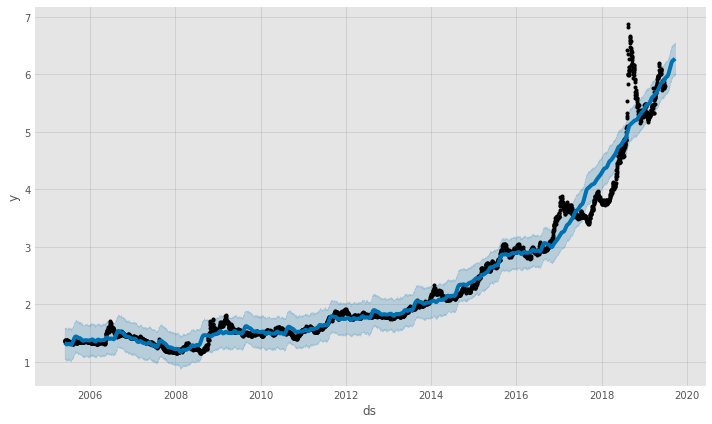

In [50]:
fig = currency_rate_model.plot(forecast, uncertainty=True)

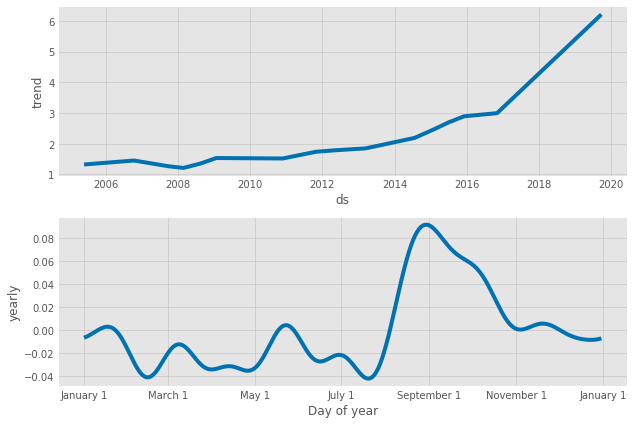

In [51]:
trend = currency_rate_model.plot_components(forecast)

In [0]:
forecast.set_index('ds', inplace=True)
currency_rate.set_index('date', inplace=True)

In [53]:
visual_df = currency_rate.join(forecast[['yhat', 'yhat_lower','yhat_upper']], how = 'outer')
visual_df.tail()

,monthly_average,yhat,yhat_lower,yhat_upper
2019-09-19,NaN,6.266668,5.987388,6.553323
2019-09-20,NaN,6.268655,6.017014,6.530286
2019-09-21,NaN,6.270719,5.985774,6.541377
2019-09-22,NaN,6.272853,6.003612,6.548319
2019-09-23,NaN,6.275049,6.010176,6.543044


In [0]:
vd = visual_df


In [0]:
visual_df = visual_df.rename(columns={'monthly_average': 'actual_rate', 'yhat': 'predicted'})

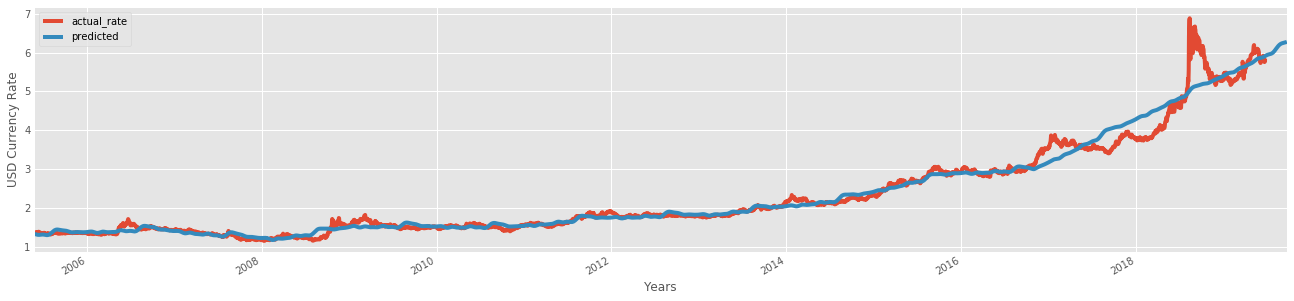

In [56]:
ax = visual_df[['actual_rate', 'predicted']].plot()
ax.set_ylabel('monthly_average')
ax.set_xlabel('date')
plt.xlabel('Years')
plt.ylabel('USD Currency Rate')
plt.show()

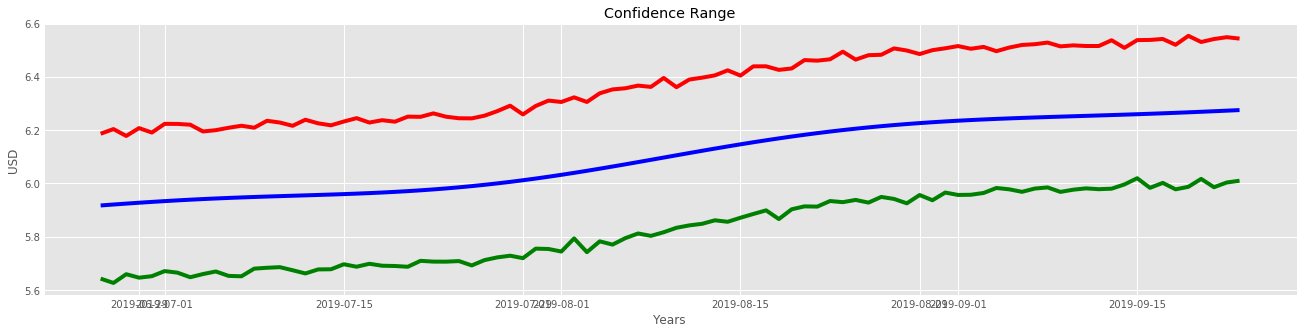

In [57]:
plt.plot(vd['yhat_lower'].tail(period), color='green')
plt.plot(vd['yhat'].tail(period), color='blue')
plt.plot(vd['yhat_upper'].tail(period), color='red')
plt.xlabel('Years')
plt.ylabel('USD')
plt.title('Confidence Range')
plt.show()

In [58]:
vd = vd.rename(columns={'yhat':'Forecasted Value', 'yhat_lower':'Lowest','yhat_upper':'Highest'})
vd = vd.drop(columns="monthly_average")
vd.tail(period)


,Forecasted Value,Lowest,Highest
2019-06-26,5.917430,5.643076,6.186360
2019-06-27,5.920965,5.626928,6.203802
2019-06-28,5.924386,5.659700,6.178085
2019-06-29,5.927667,5.646662,6.207448
2019-06-30,5.930788,5.652235,6.190765
2019-07-01,5.933736,5.671311,6.223425
2019-07-02,5.936497,5.665577,6.223180
2019-07-03,5.939069,5.648357,6.220216
2019-07-04,5.941449,5.660284,6.194818
2019-07-05,5.943644,5.669945,6.199740
